# Wikipedia search

# Get all the data from the wikipedia

In [17]:
print(hex(ord(','))[2:].upper())
print(hex(ord('R'))[2:])

2C
52


In [18]:
import requests
from bs4 import BeautifulSoup

# Infrmation of the book
author = "Dauthendey, Max"
title = "Die acht Gesichter am Biwasee"
old_date = 1867 

# Function to get the html of the author, for easier usage in the for loop
def gethtml(text):
    # replace the spaces with the _ so it can be used in the url
    text = to_hex(text)
    url_string="https://www.google.com/search?q=" + text 
    url_string += "&oq=" + text
    url_string += "&sourceid=chrome"
    url_string += "&ie=UTF-8"
    response = requests.get(
        url = url_string,
	)
    print(url_string)
    # get the content of the website
    return response.content

def to_hex(text):
    hex_text = ""
    for i in text:
        hex_text += "%" + hex(ord(i))[2:].upper()
    return hex_text

# https://www.google.com/search?q=text
# &oq=text
# &gs_lcrp=EgZjaHJvbWUyCQgAEEUYORiABDIGCAEQRRg8MgwIAhAjGCcYgAQYigUyBwgDEAAYgAQyBggEEEUYPDIGCAUQRRg8MgYIBhBFGDwyBggHEEUYPNIBCDEzNzBqMGo0qAIAsAIB
# &sourceid=chrome
# &ie=UTF-8

print(gethtml(author))

https://www.google.com/search?q=%44%61%75%74%68%65%6E%64%65%79%2C%20%4D%61%78&oq=%44%61%75%74%68%65%6E%64%65%79%2C%20%4D%61%78&sourceid=chrome&ie=UTF-8
b'<!DOCTYPE html><html lang="de" dir="ltr"><head><style nonce="Gu_Cq1DAyMBzdCsCMv152A">\na, a:link, a:visited, a:active, a:hover {\n  color: #1a73e8;\n  text-decoration: none;\n}\nbody {\n  font-family: Roboto,Helvetica,Arial,sans-serif;\n  text-align: center;\n  -ms-text-size-adjust: 100%;\n  -moz-text-size-adjust: 100%;\n  -webkit-text-size-adjust: 100%;\n}\n.box {\n  border: 1px solid #dadce0;\n  box-sizing: border-box;\n  border-radius: 8px;\n  margin: 24px auto 5px auto;\n  max-width: 800px;\n  padding: 24px;\n}\n.youtubeContainerUIModernization,\n.boxUIModernization {\n  box-sizing: border-box;\n  margin-left: auto;\n  margin-right: auto;\n  max-width: 800px;\n}\n.signInContainerUIModernization {\n    display: flex;\n    justify-content: flex-end;\n}\nh1 {\n  color: #2c2c2c;\n  font-size: 24px;\n  hyphens: auto;\n  margin: 24px 0;

In [173]:
import wikipedia
import requests
from bs4 import BeautifulSoup

# Infrmation of the book
text = "Dauthendey, Max"
title = "Die acht Gesichter am Biwasee"
old_date = 1867 

text = text.replace(",", "")

wikipedia.set_lang("de")

# Search for the possible wiki-websites about the author
search = wikipedia.search(text)
search += wikipedia.search(title)
print(search)

# Function to get the html of the author, for easier usage in the for loop
def gethtml(author, lang = "de"):
    # replace the spaces with the _ so it can be used in the url
    author.replace(" ", "_")
    response = requests.get(
		url="https://" + lang + ".wikipedia.org/wiki/" + author,
	)
    # get the content of the website
    soup = BeautifulSoup(response.content, 'html.parser')
    content = soup.find(id="content").__str__()
    return content

def find_word(content, lang):
    # get the content of the website
    for p in title.split(" "):
        # check if a part of the title is in the content of the website
        if p in content:
            # add the content to the found list
            found[s + lang] = content
            # print the deatils of the search
            # print("Search: " + s + "\nWord in Text: " + p)
            break

# the content of the websites that include a part of the title of the book
found = {}
for s in search:
    # get the content of the website
    # try:
    #     content = wikipedia.page(s).content
    # except:
    lang = "de"
    content = gethtml(s, lang)
    find_word(content, lang)
    lang = "en"
    content = gethtml(s, lang)
    find_word(content, lang)



['Max Dauthendey', 'Dauthendey', 'Maja', 'Lusamgärtchen', 'Gertraud Rostosky', 'Max (Vorname)', 'Carl Albert Dauthendey', 'Neue Welt (Würzburg)', 'Elisabeth Dauthendey', 'Liste der Biografien/Dau', 'Max Dauthendey', 'Biwa-See', 'Ōtsu', 'Acht Ansichten des Biwa-Sees', 'Liste der Bände der Bibliothek Suhrkamp', 'Bert Rudolf', 'Jānis Jaunsudrabiņš']


# Clear the found text of any html

clear the found pages of any html tags

In [174]:
for s in found.keys():
    soup = BeautifulSoup(found[s], 'html.parser')
    found[s] = soup.get_text()

In [7]:
def clear_text(text):
    # removes the first part if it already starts within a html tag
    if text.find(">") < text.find("<"):
        text = text[text.find(">")+1:]

    html = False
    i = 0
    while i < len(text):
        if text[i] == '<':
            html = True
        # if inside a html tag, remove the character
        if html:
            if text[i] == '>':
                html = False
                text = text[:i] + "  " + text[i+1:]
            else:
                text = text[:i] + text[i+1:]
                i -= 1
        i += 1
    return text

for i in range(0,len(promts)):
    promts[i] = clear_text(promts[i])
    print(promts[i] + "\n")

hen Gesellschaft für Chirurgie. 1884.
Zur Diagnose und Therapie der Pankreaszysten. In: Berliner Klinische Wochenschrift. Band 154, 1887.
Zur operativen Behandlung des Magengeschwürs. Bericht über die Verhandlungen der Deutschen Gesellschaft für Chirurgie, XXIII. Kongr. 1894.
Die Chirurgie der Nieren, der Harnleiter und der Nebennieren. 2 Bände. Enke, Stuttgart 1896–1902.
Grundzüge der allgemeinen Chirurgie und chirurgischen Technik für Ärzte und Studierende. Urban & Schwarzenberg, Berlin 1908.
Geschichte der neueren deutschen Chirurgie. Hrsg. von P. von Bruns, Enke, Stuttgart 1915 (= Neue Deutsche Chirurgie. Band 15).
Die Krankenpflege in Vergangenheit und Gegenwart. Rede, gehalten bei Übernahme des Rektorats an der Universität Marburg am 13. Oktober 1895, N.G. Eiwert, Marburg 1895.
Beiträge zu Albert Eulenburgs Real-Encyclopädie der gesammten Heilkunde. Erste Auflage.
Band 1 (1880) (Digitalisat), S. 397–412: Antisepsis
Band 2 (1880) (Digitalisat), S. 52–59: Bauchwunden; S. 597–604: B

# Searches for the titel in the pages

searches for the words from the title in the given wikipedia page, and selects the surrounding paragraph and saves it under the promts array

In [163]:
import numpy
import math

def find_all(content, word):
    n = 0
    while True:
        n = content.find(word, n)
        if n == -1:
            break
        yield n
        n += len(word)

margin = 250
# list to store the found sentences with the title
promts = []
for s in found.keys():
    # look for the position of the title in the content
    places = numpy.empty(0, dtype=int)
    places = numpy.append(places, -margin*margin)
    for p in title.split(" "):
        for gen in find_all(found[s], p):
            n = gen
            if n == -1:
                continue
            temp = places - n
            m = math.sqrt(min(temp*temp))
            if m < margin and m > -margin:
                continue
            places = numpy.append(places, n)
            # get the sentence and text around the title
            if n < margin:
                text_to_check = found[s][:n+margin]
            else:
                text_to_check = found[s][n-margin:n+margin]
            info = "Search: " + s + "; Word in Text: " + p
            info += " (" + str(n) + "):\n"
            # info += text_to_check + "\n"
            print(info)
            # add the sentence to the list
            promts.append(text_to_check)

print(len(promts))

Search: Max Dauthendeyde; Word in Text: Die (1629):

Search: Max Dauthendeyde; Word in Text: Die (2461):

Search: Max Dauthendeyde; Word in Text: Die (3507):

Search: Max Dauthendeyde; Word in Text: Die (4336):

Search: Max Dauthendeyde; Word in Text: Die (5755):

Search: Max Dauthendeyde; Word in Text: Die (7216):

Search: Max Dauthendeyde; Word in Text: Die (7823):

Search: Max Dauthendeyde; Word in Text: Die (8211):

Search: Max Dauthendeyde; Word in Text: Die (8893):

Search: Max Dauthendeyde; Word in Text: Die (10622):

Search: Max Dauthendeyde; Word in Text: Die (11217):

Search: Max Dauthendeyde; Word in Text: Die (13042):

Search: Max Dauthendeyde; Word in Text: Die (13612):

Search: Max Dauthendeyde; Word in Text: Die (14407):

Search: Max Dauthendeyde; Word in Text: Die (19667):

Search: Max Dauthendeyde; Word in Text: Die (19923):

Search: Max Dauthendeyde; Word in Text: Die (21306):

Search: Max Dauthendeyde; Word in Text: Die (22725):

Search: Max Dauthendeyde; Word in Tex

searches for the title in the given wikipedia page, and selects the surrounding paragraph and saves it under the promts array

In [175]:
import numpy
import math
import re

def find_all(content, word):
    n = 0
    pattern = re.compile(r'{}'.format(word), re.IGNORECASE)
    while True:
        match = pattern.search(content[n:])
        if not match:
            break
        n = match.start()
        yield n
        n += len(word)

margin = 250
# list to store the found sentences with the title
promts = []
for s in found.keys():
    # look for the position of the title in the content
    places = numpy.empty(0, dtype=int)
    places = numpy.append(places, -margin*margin)
    for gen in find_all(found[s], title):
        n = gen
        if n == -1:
            continue
        temp = places - n
        m = math.sqrt(min(temp*temp))
        if m < margin and m > -margin:
            continue
        places = numpy.append(places, n)
        # get the sentence and text around the title
        if n < margin:
            text_to_check = found[s][:n+margin]
        else:
            text_to_check = found[s][n-margin:n+margin]
        info = "Search: " + s + "; Word in Text: " + title
        info += " (" + str(n) + "):\n"
        info += text_to_check + "\n"
        print(info)
        # add the sentence to the list
        promts.append(text_to_check)

print(len(promts))

Search: Max Dauthendeyde; Word in Text: Die acht Gesichter am Biwasee (32829):
Emil Rudolf Weiß zu Das Unabwendbare
Frühe Prosa. Aus dem Nachlass 1890-1894 (U.a. Würzburger Impressionen. Ein Märchen der Zukunft. Nordland in Farben, 1967)
Josa Gerth (1892)
Lingam (1909)
Die geflügelte Erde (1910)
Maja (1911)
Raubmenschen (1911)
Die acht Gesichter am Biwasee (1911)
Den Nachtregen regnen hören in Karasaki (1911)
Neuauflagen: Langen Müller, München/Wien 1957, und dtv, München 1980, ISBN 3-423-01571-3.
Der Geist meines Vaters (1912)
Gedankengut aus meinen Wanderjahren (1913)
Di

Search: Max Dauthendeyde; Word in Text: Die acht Gesichter am Biwasee (10698):
fentlichungen in der „Modernen Rundschau“ sowie mit den Anfangskapiteln seines ersten impressionistischen Romans „Josa Gerth“, der die „Neue Welt“ zum Hauptschauplatz hatte. Diese erste Talentprobe, Ende 1892 bei der Verlagsbuchhandlung Edgar Pierson in Dresden erschienen, entstand unter Beeinflussung von Jens Peter Jacobsens Roman „Niehl

KeyboardInterrupt: 

# The model that searches for the year in the found sentences

loading the model

In [176]:
model_id = 'textminr/ner-multilingual-bert'

from transformers import pipeline
classifier = pipeline(
  'ner',
  model=model_id,
  aggregation_strategy='simple'
)

using the model

In [186]:
import re
import pandas as pd

def find_title(content, word):
    pattern = re.compile(r'{}'.format(word), re.IGNORECASE)
    match = pattern.search(content)
    if match:
        return [match.start(), match.end()]
    return [None, None]

def date_to_df(dates):
    # date_entities_df
    de_df = pd.DataFrame(dates)

    de_df['score'] = pd.to_numeric(de_df['score'])
    de_df['start'] = pd.to_numeric(de_df['start'])
    de_df['end'] = pd.to_numeric(de_df['end'])

    de_df['word'] = pd.to_numeric(de_df['word'], errors='coerce')
    de_df = de_df.dropna(subset=['word'])
    de_df['word'] = de_df['word'].astype(int)

    return de_df

def find_before(dates, start, ends):
    if len(ends) == 0:
        return -1
    ends.sort()
    lastend = ends[0]
    for e in ends:
        if e < start and e >= lastend:
            lastend = e
        break
    date_entities.loc[date_entities.count()['word']] = dates_df[dates_df['end'] == lastend].iloc[0]
    return lastend

def find_after(dates, start, ends, lastend):
    if len(ends) == 0:
        return
    starts.sort()
    laststart = starts[len(starts)-1]
    for s in starts:
        if s > end and s <= laststart:
            laststart = s
        break
    if dates_df[dates_df['start'] == laststart].iloc[0]['end'] == lastend:
        index = starts.index(laststart)
        if index < (len(starts) - 1):
            laststart = starts[index+1]
        elif index > 0:
            laststart = starts[index-1]
        else:
            return
    date_entities.loc[date_entities.count()['word']] = dates_df[dates_df['start'] == laststart].iloc[0]

responses = []
df = []
date_entities = pd.DataFrame(columns=['entity_group', 'score', 'word', 'start', 'end'])
for i in range(len(promts)):
    start, end = find_title(promts[i], title)
    print(str(i) + ":", start, end)
    ends, starts = [], []
    
    dates = []
    # model looks for the correct date in the text
    responses.append(classifier(promts[i]))
    # only the dates are printed, because the model also looks for other entities
    for r in responses[i]:
       print(r)
       if r['entity_group'] == 'DATE':
          starts.append(r['start'])
          ends.append(r['end'])
          dates.append(r)
          df.append(r)
    if len(dates) != 0:
        dates_df = date_to_df(dates)
    # lastend = find_before(dates, start, ends)
    # find_after(dates, end, starts, lastend)
len(responses)

0: 250 279
{'entity_group': 'AUTHOR', 'score': 0.9973986, 'word': 'Emil Rudolf Weiß', 'start': 0, 'end': 16}
{'entity_group': 'DATE', 'score': 0.9723173, 'word': '1894', 'start': 72, 'end': 76}
{'entity_group': 'DATE', 'score': 0.9985073, 'word': '1967', 'start': 153, 'end': 157}
{'entity_group': 'AUTHOR', 'score': 0.6300461, 'word': 'Gert', 'start': 164, 'end': 168}
{'entity_group': 'DATE', 'score': 0.7379331, 'word': '1892', 'start': 171, 'end': 175}
{'entity_group': 'DATE', 'score': 0.9968857, 'word': '1957', 'start': 375, 'end': 379}
{'entity_group': 'DATE', 'score': 0.99399096, 'word': '1980', 'start': 398, 'end': 402}
1: None None
{'entity_group': 'AUTHOR', 'score': 0.95286417, 'word': 'Josa Gerth', 'start': 114, 'end': 124}
{'entity_group': 'DATE', 'score': 0.89357066, 'word': '1892', 'start': 204, 'end': 208}
{'entity_group': 'AUTHOR', 'score': 0.99774194, 'word': 'Edgar Pierson', 'start': 237, 'end': 250}
{'entity_group': 'AUTHOR', 'score': 0.89452076, 'word': 'Jens Peter Jaco

3

data of the Book. The Birth and Death year of the Author.

In [187]:
df = date_to_df(df)
birth = 1800
death = 1950
date_entities = df
print(date_entities.head())
date_entities.size

  entity_group     score  word  start  end
0         DATE  0.972317  1894     72   76
1         DATE  0.998507  1967    153  157
2         DATE  0.737933  1892    171  175
3         DATE  0.996886  1957    375  379
4         DATE  0.993991  1980    398  402


35

In [188]:
date_entities = date_entities[(date_entities.word >= birth) & (date_entities.word <= death)]
average_scores = date_entities.groupby('word')['score'].mean().reset_index()

# Rename columns for clarity
average_scores.columns = ['year', 'average_score']
average_scores = pd.DataFrame(average_scores)

year_counts = date_entities.groupby('word').count().reset_index()[['word', 'score']]
year_counts.columns = ['year', 'count']

average_scores = pd.merge(average_scores, year_counts, on='year')

print(average_scores)

date_entities.head()

   year  average_score  count
0  1891       0.993439      1
1  1892       0.815752      2
2  1894       0.972317      1


,entity_group,score,word,start,end
0,DATE,0.972317,1894,72,76
2,DATE,0.737933,1892,171,175
5,DATE,0.893571,1892,204,208
6,DATE,0.993439,1891,491,495


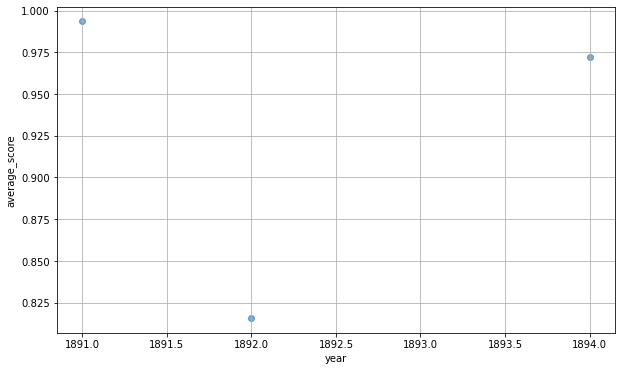

In [189]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(average_scores['year'], average_scores['average_score'], alpha=0.6)

plt.xlabel("year")
plt.ylabel("average_score")
plt.grid(True)

plt.show()

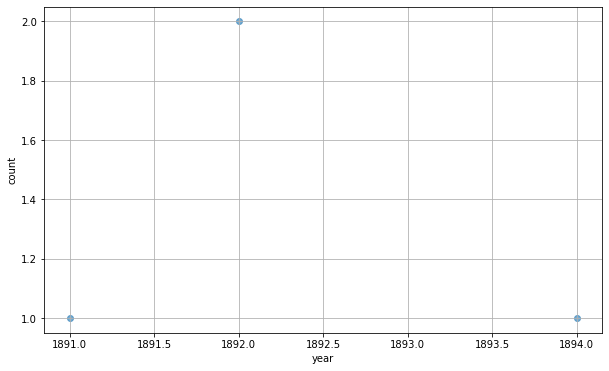

In [190]:
plt.figure(figsize=(10,6))

plt.scatter(average_scores['year'], average_scores['count'], alpha=0.6)

plt.xlabel("year")
plt.ylabel("count")
plt.grid(True)

plt.show()

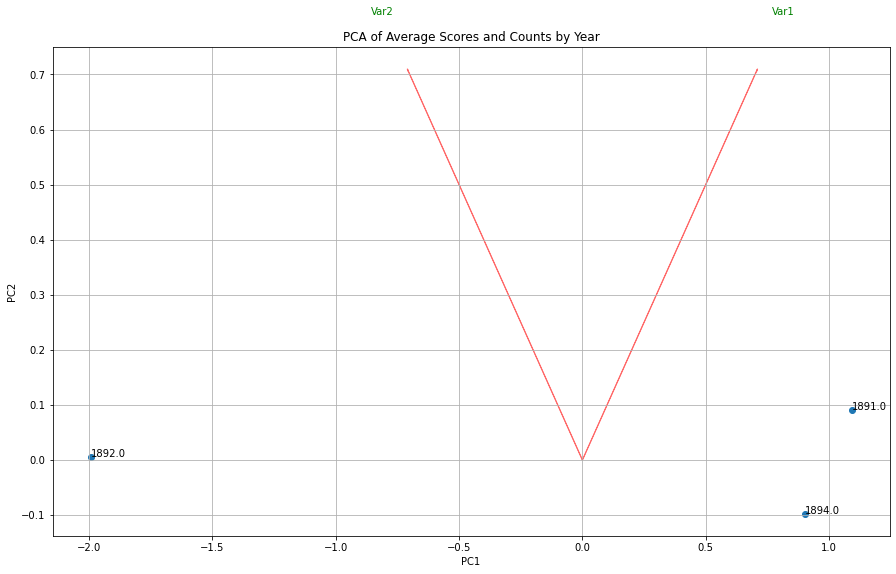

In [191]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the data
features = ['average_score', 'count']
x = average_scores[features]
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df = pd.concat([pca_df, average_scores[['year']]], axis=1)

plt.figure(figsize=(15, 9))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.title('PCA of Average Scores and Counts by Year')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(principal_components[:,0:2],np.transpose(pca.components_[0:2, :]))

for i, row in pca_df.iterrows():
    plt.annotate(row['year'], (row['Principal Component 1'], row['Principal Component 2']))

plt.show()


calculate one most probable year

In [192]:
# principal_components
# print(pca.explained_variance_ratio_)
v1, v2 = pca.explained_variance_ratio_
print(v1, v2)
calcs = {}
for i in average_scores.iterrows():
    # 1915: 0.99 (score) + 0.13 (count) = 1.12
    count = i[1]['count']/average_scores.max()['count']
    calc = i[1]['average_score'] * v1 + count * v2
    calc = calc/2
    # print(i[1]['year'],  i[1]['average_score'] * v1, '(score)', count * v2, '(count) =', calc)
    calcs[i[1]['year']] = calc
print()
win = max(calcs, key=calcs.get)
print(win, calcs[win])

0.9970317231618647 0.002968276838135347

1891.0 0.4959873558411807


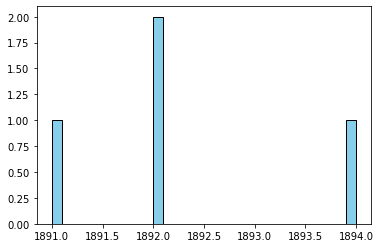

In [193]:
import matplotlib.pyplot as plt

df = df[(df.word >= birth) & (df.word <= death)]

plt.hist(df['word'], bins=30, color='skyblue', edgecolor='black')
plt.show()

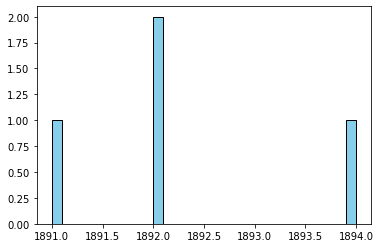

In [ ]:
import matplotlib.pyplot as plt

df = df[(df.word >= birth) & (df.word <= death)]

plt.hist(df['word'], bins=30, color='skyblue', edgecolor='black')
plt.show()